# 2. Reading files


## Load Transcript Text
Let's load your Transcript file from BrightSpace. Download your file and save it in the `data` folder from the locaction where you launched this Notebook. Since this is an excel file, you will need to use a python library called *pandas*.

In [1]:
import pandas as pd  # Use 'pd' as a shortcut for 'pandas' as it saves you the effort of typing 'pandas' every time.

In [2]:
transcript_df = pd.read_excel('data/excel/edi_2024_daniel_george.xlsx')
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance
9,9,00:00:28,Yuxuan,Something to prove?
1,1,00:00:00,George,Yes.
306,306,00:23:26,George,Exports.


The 'Unnamed' columns is a result of my not saving the file properly so let's get rid of it.

In [3]:
transcript_df = transcript_df.drop(columns=['Unnamed: 0'])
transcript_df.sample(3)

,timestamp,speaker,utterance
281,00:21:27,George,Yeah.
157,00:11:54,Daniel,The
234,00:18:15,George,I think so.


Excellent. Now we can do things like check how many speech turns (i.e., lines in the excel sheet) have been captured in the transcript.
We can also print the first few and last few lines.

In [4]:
print("Number of speech turns : ", transcript_df.shape[0])
print("------------------------------------")
print("First 3 lines:")
print(transcript_df[0:3])
print("------------------------------------")
print("Last 3 lines:")
print(transcript_df[-3:])


Number of speech turns :  501
------------------------------------
First 3 lines:
  timestamp speaker                                          utterance
0  00:00:00  Daniel  Just record the voice and then next we can do ...
1  00:00:00  George                                               Yes.
2  00:00:05  George               But we need to make a video as well.
------------------------------------
Last 3 lines:
    timestamp speaker                                     utterance
498  00:44:34  Daniel                               OK, we're done.
499  00:44:34  George  Yeah, yeah, good. I'm stopping this as well.
500  00:44:35  Yuxuan                                      Perfect.


## Counting Speech Turns
Let's start simply. Who had the most speech turns? Let's first split the dataframe into the total number of speakers.

In [5]:
speakers = transcript_df['speaker'].to_list()
speakers

['Daniel',
 'George',
 'George',
 'Daniel',
 'Daniel',
 'George',
 'George',
 'Daniel',
 'George',
 'Yuxuan',
 'George',
 'Daniel',
 'Daniel',
 'Yuxuan',
 'George',
 'Daniel',
 'Yuxuan',
 'George',
 'George',
 'George',
 'Daniel',
 'George',
 'George',
 'George',
 'Yuxuan',
 'George',
 'Daniel',
 'George',
 'Daniel',
 'George',
 'Daniel',
 'George',
 'Yuxuan',
 'Daniel',
 'George',
 'Yuxuan',
 'Yuxuan',
 'George',
 'Daniel',
 'Daniel',
 'Yuxuan',
 'George',
 'George',
 'Yuxuan',
 'Daniel',
 'George',
 'George',
 'George',
 'Yuxuan',
 'Daniel',
 'Daniel',
 'George',
 'Yuxuan',
 'Daniel',
 'George',
 'Daniel',
 'George',
 'George',
 'Yuxuan',
 'George',
 'Yuxuan',
 'George',
 'George',
 'Yuxuan',
 'Yuxuan',
 'George',
 'George',
 'George',
 'Yuxuan',
 'Daniel',
 'George',
 'George',
 'Daniel',
 'Yuxuan',
 'Yuxuan',
 'George',
 'Yuxuan',
 'Yuxuan',
 'Daniel',
 'Yuxuan',
 'George',
 'George',
 'Daniel',
 'George',
 'Yuxuan',
 'George',
 'George',
 'George',
 'Yuxuan',
 'George',
 'Yuxuan',

This is not very useful; we need to find a _unique_ number of speakers. 

In [6]:
unique_speakers = set(speakers)
unique_speakers

{'Daniel', 'George', 'Unclear', 'Yuxuan'}

Go back to the excel file, fix the speakers if necessary, and run the above cells again until you get only the expected number of speakers.

### Strategy 1: The Spaces between Words
Let's try the basic strategy of separating words by the spaces in between them.

In [7]:
def get_words(utterances):
    utt_words_list = []
    for utt in utterances:
        words = utt.lower().split()
        utt_words_list.append(words)
    return utt_words_list

The next few steps (counting words and graphically displaying the counts) will be pretty much the same for all other strategies, so let's write functions for them.

**NOTE:** In the next few steps we will be using some more existing libraries, so we will import them as needed.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def count_words(utterance_words_list):
    all_words = []
    for utt_words in utterance_words_list :
        all_words.extend(utt_words)
    unique_words = list(set(all_words))
    word_counts = [all_words.count(w) for w in unique_words]
    counts_df = pd.DataFrame({'word' : unique_words, 'count' : word_counts})
    return counts_df

def plot_words(df, max_words=40):
    df = df.sort_values(by=['count'], ascending=False)
    df = df[0:max_words]
    plt.figure(figsize=(4,int(max_words/5)), dpi=100)
    g=sns.barplot(y='word', x='count', data=df, color='gray')
    

In [9]:
utterances = transcript_df['utterance'].to_list()
utterance_words_list = get_words(utterances)

word_counts_df = count_words(utterance_words_list)
# all_w = [word for review_words in review_words_list for word in review_words]
# [item for row in matrix for item in row]

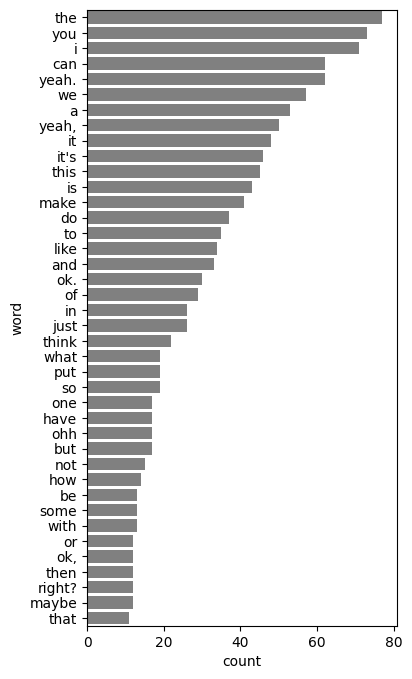

In [10]:
plot_words(word_counts_df, max_words=40)

What do you notice in the plot? Do you think the most frequently-occurring words help you understand the discussion in any way?

### Strategy 2: tokenization
Let's start exploring slightly more sophisticated ways to identify words, namely "tokenization", which is a fancy term for breaking up a string of text into words and punctuation. For more on the nuances of tokenization, see [Chapter 3 of the NLTK book](https://www.nltk.org/book/ch03.html).

In [11]:
from nltk.tokenize import word_tokenize

def get_words_tokenized(utterances):
    utterance_words_list = []
    for utterance in utterances:
        words = word_tokenize(utterance.lower())
        utterance_words_list.append(words)
    return utterance_words_list

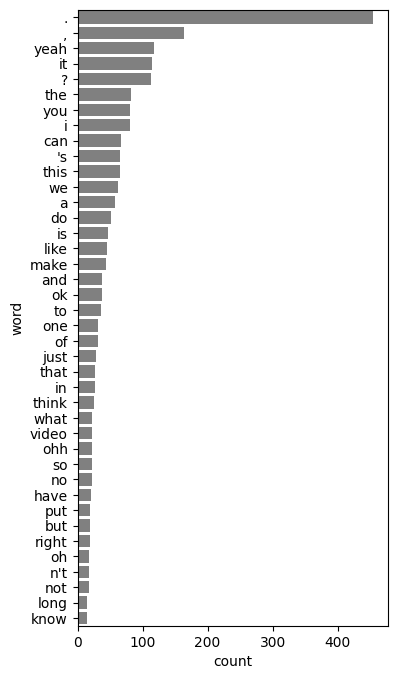

In [12]:
utterance_words_list = get_words_tokenized(utterances)
word_counts_df = count_words(utterance_words_list)
plot_words(word_counts_df, max_words=40)

Do you see a difference in the two plots?

### Strategy 2.5 : Remove punctuation

In [13]:
import string
punctuations = string.punctuation + "’"

def get_words_tokenized_nopunct(utterances, puncts=punctuations):
    utterance_words_list = []
    for utterance in utterances:
        words = word_tokenize(utterance.lower())
        words_no_punct = [word for word in words if not word in punctuations]
        utterance_words_list.append(words_no_punct)
    return utterance_words_list



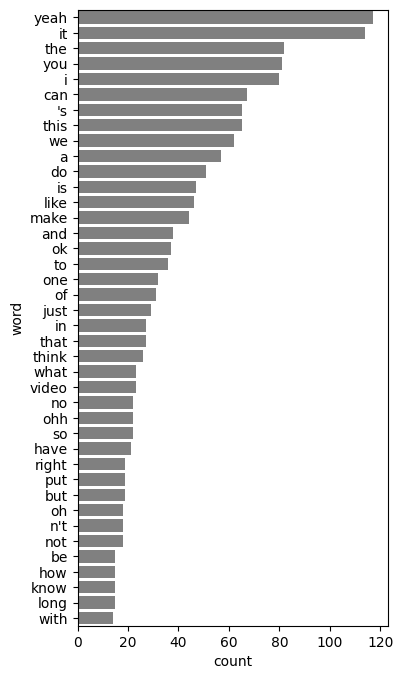

In [14]:
utterance_words_list = get_words_tokenized_nopunct(utterances)
word_counts_df = count_words(utterance_words_list)
plot_words(word_counts_df, max_words=40)

### Strategy 3: Disregard Stop Words
In the above plots, we have several occurrences of articles, prepositions, and pronouns (collectively termed "stop words" in natural language processing), which are not quite as interesting in identifying context as nouns, verbs, adjectives, and adverbs. Let's try and remove these.

In [15]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords') # uncomment and run this line the first time you run this code.
stop_words = set(stopwords.words('english'))

def get_words_tokenized_nopunct_nostop(utterances, puncts=punctuations, stop_w=stop_words):
    utterance_words_list = []
    for utterance in utterances:
        words = word_tokenize(utterance.lower())
        words_no_punct = [word for word in words if (not word in punctuations) and (not word in stop_w)]
        utterance_words_list.append(words_no_punct)
    return utterance_words_list


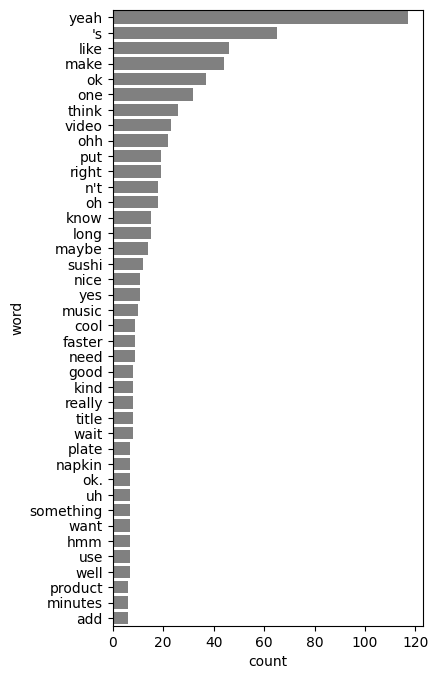

In [16]:
utterance_words_list = get_words_tokenized_nopunct_nostop(utterances)
word_counts_df = count_words(utterance_words_list)
plot_words(word_counts_df, max_words=40)

This is much better. What do you notice in your own reviews?

## Morphology (Skip for later?)
Should `work` and `works` be treated differently or in the same way? Words like `gone`, `went`, `going` etc. are inflected forms of the base verb `go`. In natural language processing, substituting inflected forms with the base form is called **lemmatization** . Note that lemmatization is not always helpful and it really depends on what information you think is relevant for your analysis.

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk import word_tokenize
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

utterance_words_list = get_words_tokenized_nopunct_nostop(utterances)
utterance_words_list_lemmatized = []

def get_lemma(word):
    
    # pos_refs = {'n': ['NN', 'NNS', 'NNP', 'NNPS'],
    #            'v': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    #            'r': ['RB', 'RBR', 'RBS'],
    #            'a': ['JJ', 'JJR', 'JJS']}

    pos_label = (pos_tag(word_tokenize(word))[0][1][0]).lower()
    if pos_label == 'j': pos_label = 'a'    # 'j' <--> 'a' reassignment
    if pos_label in ['a', 's', 'v']: # For adjectives and verbs
        lemma = lemmatizer.lemmatize(word, pos=pos_label)
    else:   # For nouns and everything else as it is the default kwarg
        lemma = lemmatizer.lemmatize(word)
    return lemma
    
    
def get_lemmatized_utterance_text(utterance_words_list):
    utterance_words_list_lemmatized = []
    for utterance_words in utterance_words_list :
        lemmatized_tokens = [get_lemma(word) for word in utterance_words]
        utterance_words_list_lemmatized.append(lemmatized_tokens)
    return utterance_words_list_lemmatized


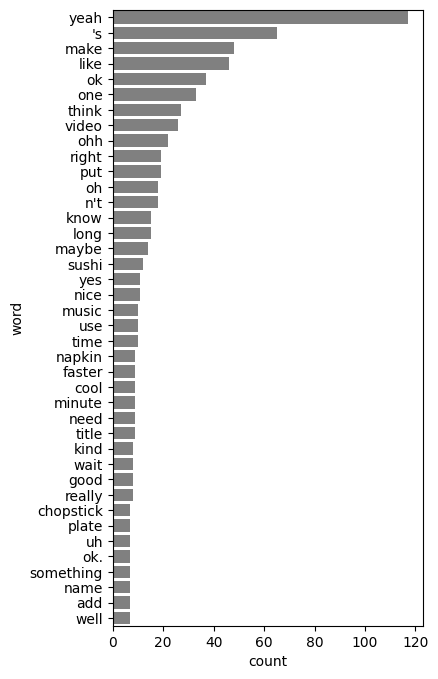

In [18]:
utterance_words_list_lemmatized = get_lemmatized_utterance_text(utterance_words_list)
word_counts_df = count_words(utterance_words_list_lemmatized)
plot_words(word_counts_df, max_words=40)

## Examining Contexts
Now that you know what words are most frequent in your text, how do you know the context in which they are being used? We use Keyword in Context (KWIC) or 'text concordance' to examine the contexts in which a word is used.

In [19]:
from nltk.text import Text
from nltk.corpus import gutenberg

full_path_to_data_folder = '/Users/schandrasegara/research/id5138-comptext/'

utterance_text = ' '.join(utterances)
with open('data/transcript-utterances.txt', 'w') as fo:
    fo.write(utterance_text)
## NOTE: substitute above string with the path you find in your system, starting with the root directory.

text = Text(gutenberg.words( full_path_to_data_folder + 'data/text/transcript-utterances.txt'))

In [20]:
text.concordance('right', width=105, lines=25)

Displaying 19 of 19 matches:
 ? Yeah , it ' s fine . Is our hands visible or ? Right . Yeah , because . Figure out what you would like
ct ? Alright . But it ' s not a working product , right ? It ' s just a ... Yeah , no , of course not . Y
 Ohh no . Yeah , they don ' t hold much anymore , right ? It ' s not very sticky . No . Then we have just
 a photo from above so thatâ ¦ Ohh like this way right ? Nice . Do you know what kind of flyer it looks 
make supper . Is it pink ? Yes , Sakura is pink . Right . You know this ? Oh yeah . Ohh chrysanthemum . Y
ll rice . Small rice ? Like or like this could be right ? Or a . It ' s like balls , right ? Yeah . We ma
 this could be right ? Or a . It ' s like balls , right ? Yeah . We make rice into like . And maybe you c
 . And yeah , this is . Yeah , this is a salmon , right ? Salmon . Salmon . Ohh . And maybe the rice is t
don ' t know . I don ' t know . It ' s Japanese , right ? Yes , all this sushi name is translate from Jap
. Hmm , very tast

## Computing some overall statistics
Let's get a non-content-level overview of the discussion

In [21]:
import statistics

utterance_words_list = get_words_tokenized_nopunct(utterances)
utterance_lengths = [len(utterance_words) for utterance_words in utterance_words_list]
mean_utterance_length = round(statistics.mean(utterance_lengths))
median_utterance_length = statistics.median(utterance_lengths)

print(f'{len(utterances)} utterances loaded with an average utterance length of {mean_utterance_length} words\n'+
      f'and a median of {median_utterance_length} words')

501 utterances loaded with an average utterance length of 5 words
and a median of 4 words


In [22]:
print(utterance_words_list[:3])

[['just', 'record', 'the', 'voice', 'and', 'then', 'next', 'we', 'can', 'do', 'something', '...'], ['yes'], ['but', 'we', 'need', 'to', 'make', 'a', 'video', 'as', 'well']]


Text(0.5, 0, 'utterance length in words')

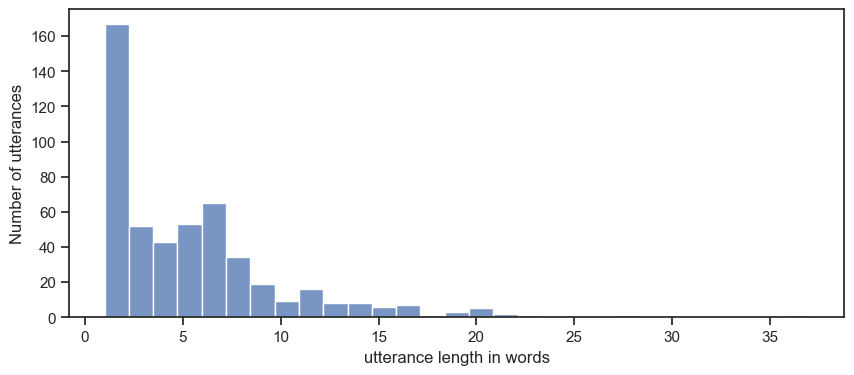

In [23]:
sns.set_theme('notebook')
sns.set_style('ticks')
plt.figure(figsize=(10,4), dpi=100)
g = sns.histplot(utterance_lengths)
g.set_ylabel('Number of utterances')
g.set_xlabel('utterance length in words')

In [24]:
df = pd.DataFrame({'utterance' : utterances, 'length_in_words' : utterance_lengths})
df.sample(5)

,utterance,length_in_words
460,Put in brackets.,3
224,I can't eat this.,5
200,Yeah.,1
331,OK.,1
488,(Whispering),1


In [25]:
long_utterances_df = df[df['length_in_words'] > mean_utterance_length]
short_utterances_df = df[df['length_in_words'] <= mean_utterance_length]
print(f'{long_utterances_df.shape[0]} of {df.shape[0]} utterances ({long_utterances_df.shape[0]/df.shape[0] :.0%}) are of above-average length.')

186 of 501 utterances (37%) are of above-average length.


## Exercise
Compare speech turns by individual interlocutors. Try and figure out the following:
1. Who spoke more than others? What are different ways in which you can interpret this question?
2. Was there a difference in what each speaker said?
3. How did the final idea emerge?

Some tips:

In [26]:
speakerlist = list(unique_speakers) # make a list
speakerlist.pop()                   # remove 'Unclear' speaker
speakerlist

['Daniel', 'Unclear', 'George']

In [28]:
yux_utterances = transcript_df[transcript_df['speaker'] == 'Yuxuan']['utterance']
print('Number of speech turns by Yuxuan:', len(yux_utterances))


Number of speech turns by Yuxuan: 94
